In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

The dataset is loaded into a pandas DataFrame using the pandas library and stored in the raw_df variable. This DataFrame contains the unprocessed and uncleaned raw data, serving as the foundation for subsequent exploratory data analysis and preprocessing steps.

In [2]:
raw_df = pd.read_csv(r'../datasets/world_population.csv')

### Dataset Overview
The analysis utilizes the World Population dataset, which contains information on the population of various countries and regions around the world. The dataset is sourced from a publicly available CSV file and includes relevant columns such as country names, population figures, and other geographical details.
<br><br>
Key Features:
The dataset provides insights into global population trends, allowing for analysis of population distribution, growth, and comparisons across different countries and regions.

# Initial Data Exploration

In [3]:
raw_df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [5]:
raw_df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.300000e+02,2.330000e+02,2.300000e+02,2.270000e+02,2.270000e+02,2.290000e+02,2.290000e+02,2.300000e+02,2.320000e+02,230.000000,232.000000,234.000000
mean,117.500000,3.463225e+07,3.360071e+07,3.206600e+07,3.027016e+07,2.684050e+07,1.933046e+07,1.628288e+07,1.586650e+07,5.816637e+05,456.811652,1.009553,0.427051
std,67.694165,1.378892e+08,1.358732e+08,1.315071e+08,1.260742e+08,1.133525e+08,8.130962e+07,6.934547e+07,6.835586e+07,1.769133e+06,2083.740364,0.013390,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.064710e+05,3.942950e+05,3.827265e+05,3.294700e+05,2.619280e+05,2.237520e+05,1.458805e+05,2.567250e+03,36.598125,1.001925,0.010000
50%,117.500000,5.762857e+06,5.456681e+06,5.244415e+06,4.889741e+06,4.491202e+06,3.785847e+06,3.135123e+06,2.511718e+06,7.714100e+04,95.346750,1.007900,0.070000
75%,175.750000,2.265372e+07,2.152263e+07,1.973085e+07,1.682585e+07,1.562547e+07,1.188276e+07,9.817257e+06,8.817329e+06,4.146432e+05,236.884000,1.016650,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [6]:
raw_df.columns


Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [7]:
raw_df.index

RangeIndex(start=0, stop=234, step=1)

In [8]:
raw_df.shape

(234, 17)

In [9]:
raw_df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

In [10]:
raw_df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [11]:
raw_df.isnull().sum().sum()

np.int64(45)

To gain a better understanding of the dataset, several basic exploratory data analysis techniques were employed. The results are as follows: <br>
- Data Preview: The head() method was used to display the first few rows of the dataset, providing insight into the structure and content of the data.
- Data Information: The info() method was utilized to retrieve information about the dataset, including the index dtype and column dtypes, non-null values, and memory usage.
- Summary Statistics: The describe() method was applied to generate summary statistics for the dataset, including measures of central tendency and variability.
- Column Names: The columns attribute was used to retrieve the list of column names in the dataset.
- Index Inspection: The index attribute was examined to understand the index structure and data type.
- Dataset Dimensions: The shape attribute was used to determine the number of rows and columns in the dataset.
- Missing Values: The isnull().sum() method was applied to identify the number of missing values in each column, helping to assess data quality.
- Unique Values: The nunique() method was used to determine the number of unique values in each column, providing insight into data variability.  

These initial steps helped to identify the data types, missing values, and distribution of values in the dataset, laying the groundwork for further analysis.

### Key Findings from Initial Exploration
The initial exploratory data analysis revealed several key insights about the dataset:
- Dataset Dimensions: The dataset consists of 234 rows and 17 columns.
- Data Types: The dataset contains 12 float data types, 1 integer data type, and 4 object data types.
- Missing Values: A total of 45 missing values were identified across the dataset.
- Population Trends: Summary statistics provided insights into population trends, including:
- Mean population over the years
- Maximum population recorded during the time period (1970-2022)
- Minimum population recorded during the time period (1970-2022)

These findings provide a solid foundation for further analysis and data cleaning. The presence of missing values will need to be addressed to ensure accurate and reliable results.

In [12]:
corr_data = raw_df.select_dtypes(include=['int64','float64']).corr()

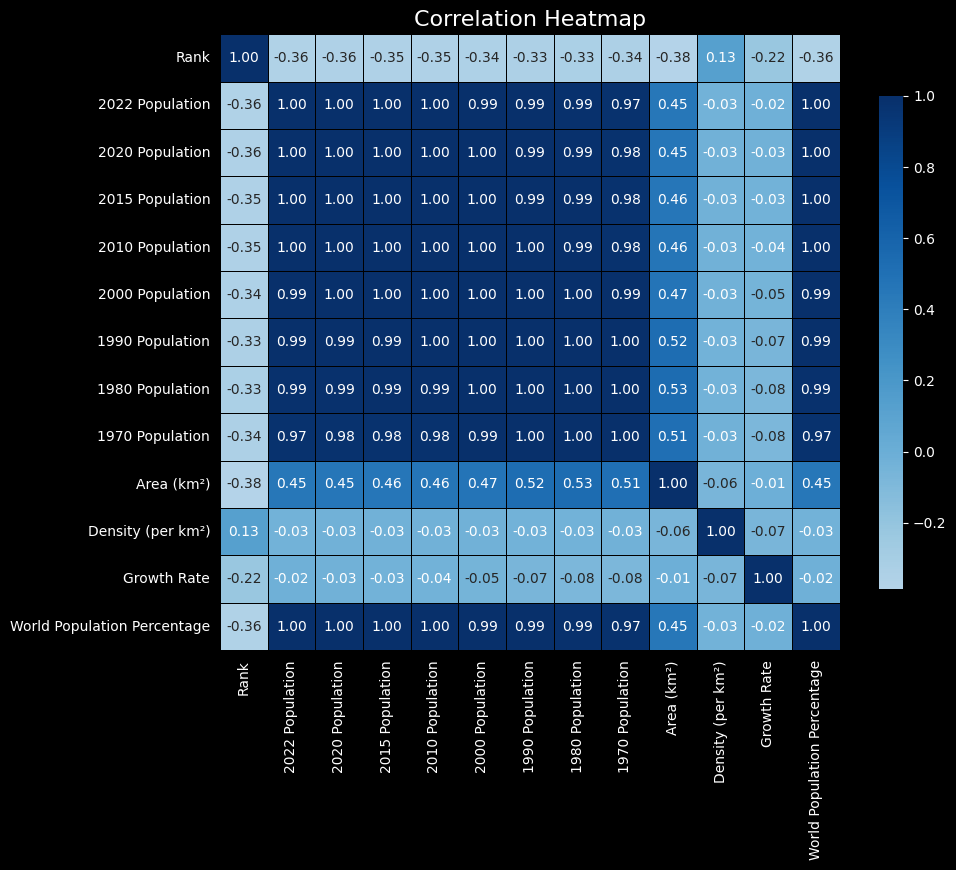

In [13]:
plt.subplots(figsize=(10, 8), facecolor='black')
ax = plt.gca()
sns.heatmap(corr_data, annot = True, fmt = '.2f', cmap='Blues', center=0, linecolor='black', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16, color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_color('white')
cbar.ax.tick_params(colors='white')
plt.show()

# Correlation Analysis
A correlation plot is generated to identify relationships between variables in the dataset. The analysis revealed the following key findings:
- Population Trends: The population of previous years showed a high correlation with the population of the preceding year, indicating a strong continuity in population trends over time.
- Geographical Factors: The area of the country exhibited a notable correlation with population-related variables, suggesting that larger countries tend to have larger populations.
- Growth Rate and Global Population Share: The growth rate showed a negative correlation with the world population percentage, implying that countries with higher growth rates tend to have a smaller share of the global population.

These findings provide valuable insights into the relationships between variables in the dataset and can inform further analysis and modeling efforts.

- Population: Strong positive correlation across all years (1970-2022).
- Area: Moderate positive correlation with population.
- Rank: Weak negative correlation with population & area.
- Density: Weak negative correlation with population & area; near-zero with growth rate.
- Growth Rate: Near-zero correlation with area.
- World Population Percentage: Strongly correlated with population.

Key Takeaways:
* Population size is relatively stable over time.
* Larger countries tend to have larger populations.
* Density and growth rate are weakly related to other variables.

# Handling Missing Values

In [14]:
def impute_population_exponential(df, population_cols, growth_rate_col):
    """Imputes missing population values using exponential growth rate."""
    df = df.copy() #to prevent changes to original dataframe.
    for i in range(1, len(df)):
        for population_col in population_cols:
            if pd.isna(df.loc[i, population_col]):
                previous_population = df.loc[i - 1, population_col]
                growth_rate = df.loc[i, growth_rate_col]
                if not np.isnan(previous_population) and not np.isnan(growth_rate):
                    df.loc[i, population_col] = previous_population * (1 + growth_rate)
    return df

To address the missing population values in the dataset, a custom function impute_population_exponential was developed. This function utilizes an exponential imputation approach to estimate missing population values based on the available data.

In [15]:
population_cols = ['2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population']

In [16]:
raw_df = impute_population_exponential(raw_df, population_cols, 'Growth Rate')

In [17]:
raw_df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [18]:
def growth_rate(df):
    df = df.copy()
    for i in range(1, len(df)):
        if pd.isna(df.loc[i, 'Growth Rate']):
            start_population = df.loc[i, '1970 Population']
            current_population = df.loc[i, '2022 Population']
            if not np.isnan(start_population) and not np.isnan(current_population):
                df.loc[i, 'Growth Rate'] = (current_population - start_population) / start_population * 100
    return df

To calculate the growth rate, a custom function growth_rate was developed. This function takes the current population and start population as inputs and calculates the growth rate using the following formula: <br>
Growth Rate = ((Current Population - Start Population) / Start Population) × 100

In [19]:
raw_df = growth_rate(raw_df)

In [20]:
raw_df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     2
Density (per km²)              4
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [21]:
missing_data = raw_df[raw_df.isnull().any(axis=1)]  

In [22]:
missing_data

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
100,52,CIV,Ivory Coast,Yamoussoukro,Africa,28160542.0,26811790.0,23596741.0,21120042.0,1.679967e+07,11910540.0,8303809.0,5477086.0,322463.0,NaN,414.151905,0.35
101,139,JAM,Jamaica,Kingston,North America,2827377.0,2820436.0,2794445.0,2733896.0,2.612205e+06,2392030.0,2135546.0,1859091.0,10991.0,NaN,52.083841,0.04
183,72,SEN,Senegal,Dakar,Africa,17316449.0,16436119.0,14356181.0,12530121.0,9.704287e+06,7536001.0,5703869.0,4367744.0,NaN,NaN,1.026100,0.22
211,153,TTO,Trinidad and Tobago,Port-of-Spain,North America,1531044.0,1518147.0,1460177.0,1410296.0,1.332203e+06,1266518.0,1127852.0,988890.0,5130.0,NaN,1.003500,0.02
227,51,VEN,Venezuela,Caracas,South America,28301696.0,28490453.0,30529716.0,28715022.0,1.304344e+03,19750579.0,15210443.0,11355475.0,NaN,30.882,1.003600,0.35


In [23]:
raw_df.loc[183, 'Area (km²)'] = 196722.0
raw_df.loc[227, 'Area (km²)'] = 912050.0

For the missing area values, manual imputation was performed by researching and gathering accurate information from reliable online sources. The verified values were then used to fill in the missing data, ensuring the integrity and accuracy of the dataset.

In [24]:
raw_df.isnull().sum()  

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              4
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [25]:
missing_data = raw_df[raw_df.isnull().any(axis=1)]

In [26]:
missing_data

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
100,52,CIV,Ivory Coast,Yamoussoukro,Africa,28160542.0,26811790.0,23596741.0,21120042.0,16799670.0,11910540.0,8303809.0,5477086.0,322463.0,NaN,414.151905,0.35
101,139,JAM,Jamaica,Kingston,North America,2827377.0,2820436.0,2794445.0,2733896.0,2612205.0,2392030.0,2135546.0,1859091.0,10991.0,NaN,52.083841,0.04
183,72,SEN,Senegal,Dakar,Africa,17316449.0,16436119.0,14356181.0,12530121.0,9704287.0,7536001.0,5703869.0,4367744.0,196722.0,NaN,1.026100,0.22
211,153,TTO,Trinidad and Tobago,Port-of-Spain,North America,1531044.0,1518147.0,1460177.0,1410296.0,1332203.0,1266518.0,1127852.0,988890.0,5130.0,NaN,1.003500,0.02


In [27]:
raw_df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [28]:
def density(df):
    df = df.copy()
    for i in range(1,len(df)):
        if pd.isna(df.loc[i, 'Density (per km²)']):
            population = df.loc[i, '2022 Population']
            area = df.loc[i, 'Area (km²)']
            if not np.isnan(population) and not np.isnan(area) and area > 0:
                df.loc[i, 'Density (per km²)'] = population / area
    return df

To calculate the population density, a custom function was developed using the following formula:
Population Density = Population / Land Area

In [29]:
raw_df = density(raw_df)

In [30]:
raw_df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

The following steps have been successfully completed to address missing values and enhance the dataset:
- Imputed population values using an exponential approach
- Calculated growth rates
- Manually filled in area values
- Calculated population density

In [31]:
df = raw_df.copy()
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.00,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.00,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.00,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.00,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.00,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.00,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.00,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.00,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,57831553.26,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


# Visualization

In [32]:
def plot_population_map(df, country_col, population_col):
    """
    Plots population data on a world map using plotly.

    Args:
        df (pd.DataFrame): DataFrame with country and population data.
        country_col (str): Column with country names.
        population_col (str): Column with population data.
    """
    fig = px.choropleth(
        data_frame=df, 
        locations=country_col,
        locationmode='country names',
        color=population_col,
        hover_name=country_col,
        hover_data=[country_col, population_col],
        title='Population by Country',
        color_continuous_scale=px.colors.sequential.Blues,
        projection='orthographic'
        )
    
    fig.update_geos(
        visible=True,
        resolution=110,
        fitbounds="locations",
        countrycolor="grey",
        showocean=True,
        oceancolor="lightblue",
        showland=True,
        landcolor="lightyellow"
    )
    
    fig.update_layout(
        title_x=0.3,
        title_font=dict(size=20, color='white'),
        coloraxis_colorbar=dict(
            title='Population',
            title_font=dict(size=14, color='white'),
            tickfont=dict(size=12, color='white'),
        ),
        width=800,
        height=600,
        margin=dict(l=20, r=20, t=60, b=20),
        paper_bgcolor="black", 
        geo_bgcolor="black"
    )

    fig.show()

In [33]:
plot_population_map(df, 'Country', '2022 Population')

In [34]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

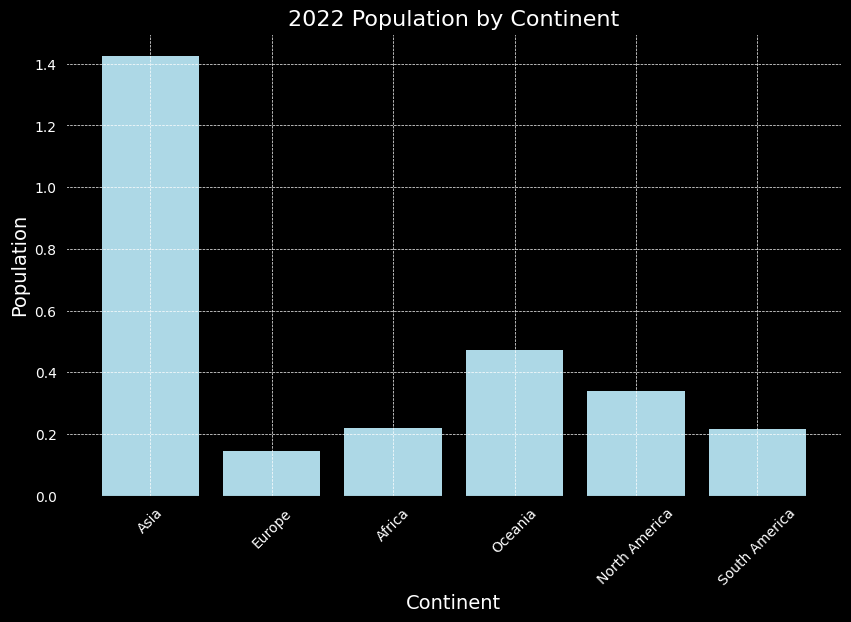

In [35]:
plt.subplots(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.bar(df['Continent'], df['2022 Population'], color='lightblue')
plt.title('2022 Population by Continent', fontsize=16, color='white')
plt.xlabel('Continent', fontsize=14, color='white')
plt.ylabel('Population', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()

In [36]:
continent_area = df.groupby('Continent')['Area (km²)'].sum().reset_index().sort_values(by='Area (km²)', ascending=False)
continent_density = df.groupby('Continent')['Density (per km²)'].sum().reset_index().sort_values(by='Density (per km²)', ascending=False)
continent_population = df.groupby('Continent')['World Population Percentage'].sum().reset_index().sort_values(by='World Population Percentage', ascending=False)

In [37]:
continent_area

,Continent,Area (km²)
1,Asia,32138141.0
0,Africa,30317963.0
3,North America,24244178.0
2,Europe,23010411.0
5,South America,17828987.0
4,Oceania,8515081.0


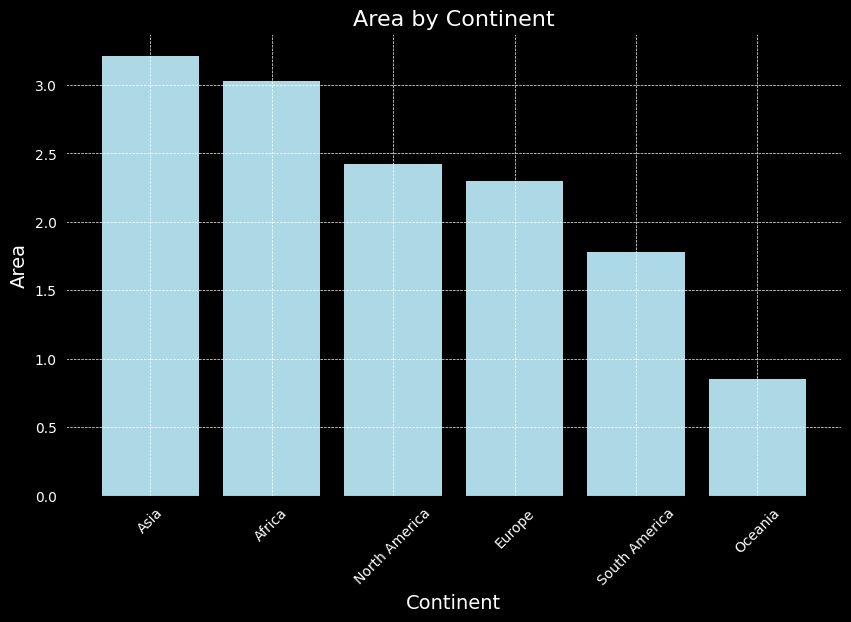

In [38]:
plt.subplots(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.bar(data=continent_area, x='Continent', height='Area (km²)', color='lightblue')
plt.title('Area by Continent', fontsize=16, color='white')
plt.xlabel('Continent', fontsize=14, color='white')
plt.ylabel('Area', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()

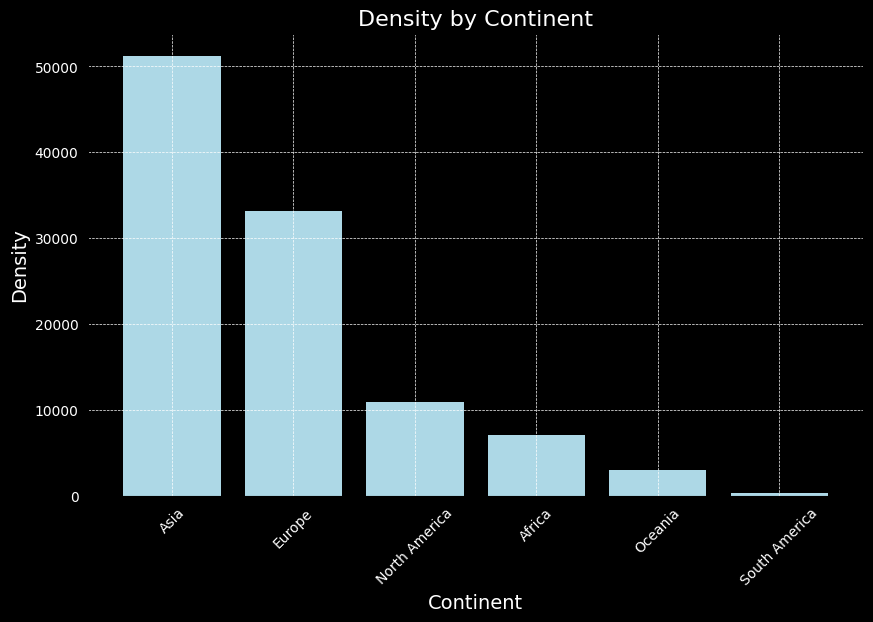

In [39]:
plt.subplots(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.bar(data=continent_density, x='Continent', height='Density (per km²)', color='lightblue')
plt.title('Density by Continent', fontsize=16, color='white')
plt.xlabel('Continent', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()

In [40]:
continent_population

,Continent,World Population Percentage
1,Asia,59.19
0,Africa,17.87
2,Europe,9.33
3,North America,7.51
5,South America,5.48
4,Oceania,0.55


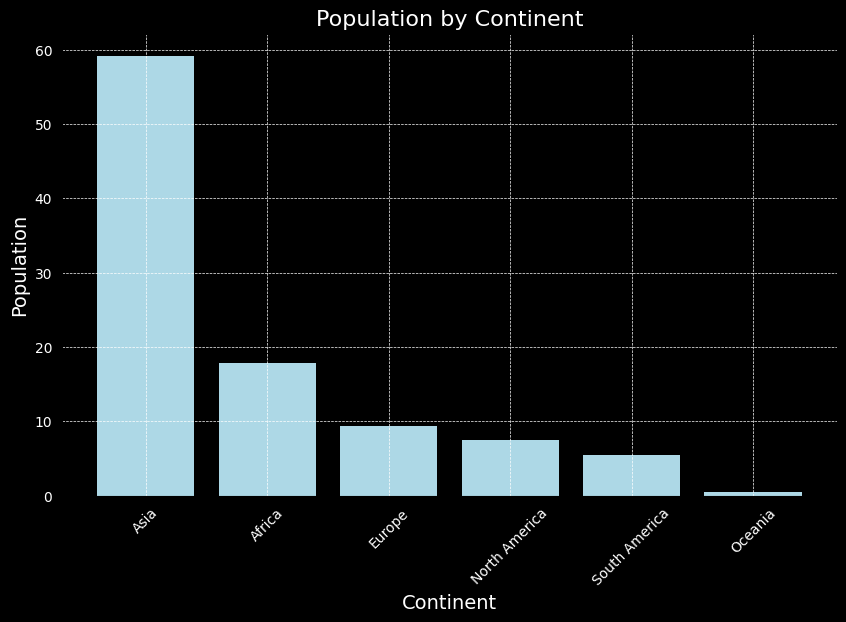

In [41]:
plt.subplots(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.bar(data=continent_population, x='Continent', height='World Population Percentage', color='lightblue')
plt.title('Population by Continent', fontsize=16, color='white')
plt.xlabel('Continent', fontsize=14, color='white')
plt.ylabel('Population', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()

In [42]:
top_countries_by_area = df.nlargest(10, 'Area (km²)')[['Country', 'Area (km²)']]
top_countries_by_density = df.nlargest(10, 'Density (per km²)')[['Country', 'Density (per km²)']]
top_countries_by_population = df.nlargest(10, 'World Population Percentage')[['Country', 'World Population Percentage']]
top_countries_by_growth_rate = df.nlargest(10, 'Growth Rate')[['Country','Growth Rate']]

In [43]:
top_countries_by_area

,Country,Area (km²)
171,Russia,17098242.0
35,Canada,9984670.0
41,China,9706961.0
221,United States,9372610.0
27,Brazil,8515767.0
11,Australia,7692024.0
92,India,3287590.0
8,Argentina,2780400.0
105,Kazakhstan,2724900.0
2,Algeria,2381741.0


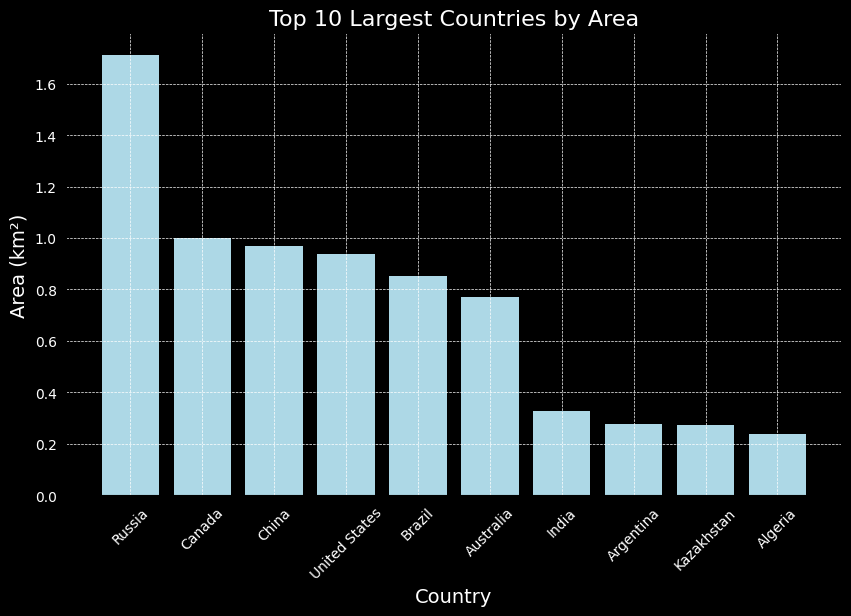

In [44]:
plt.subplots(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.bar(data=top_countries_by_area, x='Country', height='Area (km²)', color='lightblue')
plt.title('Top 10 Largest Countries by Area', fontsize=16, color='white')
plt.xlabel('Country', fontsize=14, color='white')
plt.ylabel('Area (km²)', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()

In [45]:
top_countries_by_density

,Country,Density (per km²)
119,Macau,23172.2667
134,Monaco,18234.5000
187,Singapore,8416.4634
89,Hong Kong,6783.3922
76,Gibraltar,5441.5000
15,Bahrain,1924.4876
123,Maldives,1745.9567
125,Malta,1687.6139
188,Sint Maarten,1299.2647
22,Bermuda,1188.5926


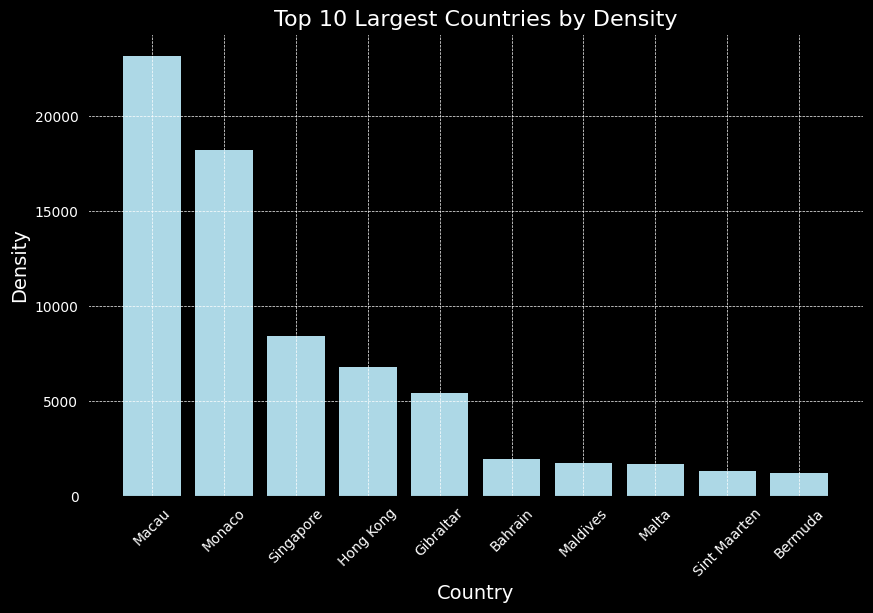

In [46]:
plt.subplots(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.bar(data=top_countries_by_density, x='Country', height='Density (per km²)', color='lightblue')
plt.title('Top 10 Largest Countries by Density', fontsize=16, color='white')
plt.xlabel('Country', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()

In [47]:
top_countries_by_population

,Country,World Population Percentage
41,China,17.88
92,India,17.77
221,United States,4.24
93,Indonesia,3.45
156,Pakistan,2.96
149,Nigeria,2.74
27,Brazil,2.70
16,Bangladesh,2.15
171,Russia,1.81
131,Mexico,1.60


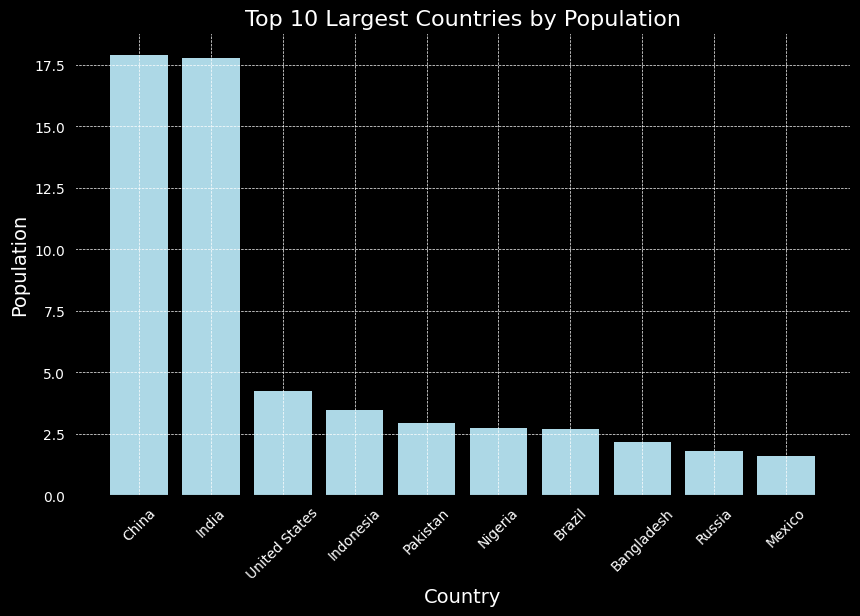

In [48]:
plt.subplots(figsize=(10,6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.bar(data=top_countries_by_population,x='Country', height='World Population Percentage', color='lightblue')
plt.title('Top 10 Largest Countries by Population', fontsize=16, color='white')
plt.xlabel('Country', fontsize=14, color='white')
plt.ylabel('Population', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()


In [49]:
top_countries_by_growth_rate

,Country,Growth Rate
100,Ivory Coast,414.151905
101,Jamaica,52.083841
133,Moldova,1.069100
164,Poland,1.040400
148,Niger,1.037800
202,Syria,1.037600
189,Slovakia,1.035900
55,DR Congo,1.032500
130,Mayotte,1.031900
39,Chad,1.031600


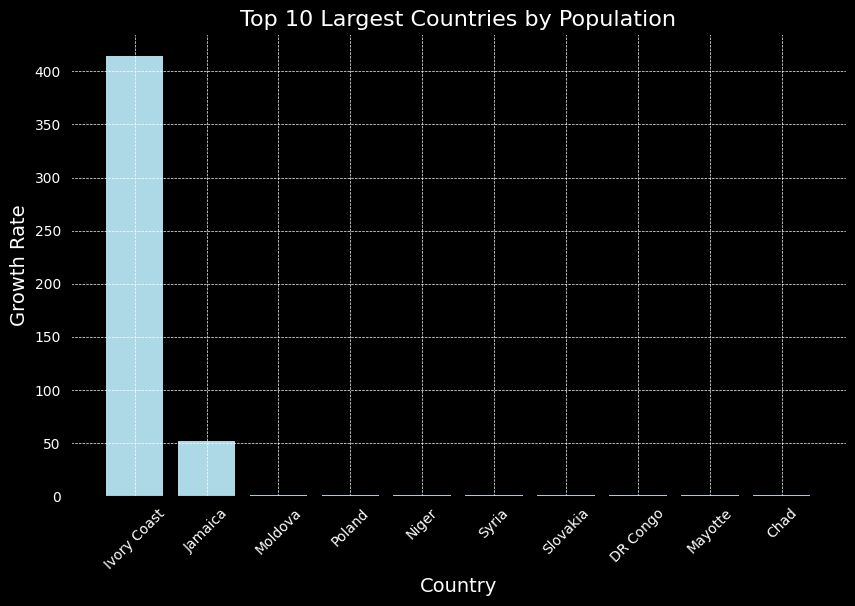

In [50]:
plt.subplots(figsize=(10,6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
plt.bar(data=top_countries_by_growth_rate,x='Country', height='Growth Rate', color='lightblue')
plt.title('Top 10 Largest Countries by Population', fontsize=16, color='white')
plt.xlabel('Country', fontsize=14, color='white')
plt.ylabel('Growth Rate', fontsize=14, color='white')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.show()

In [51]:
top_countries_by_growth_rate

,Country,Growth Rate
100,Ivory Coast,414.151905
101,Jamaica,52.083841
133,Moldova,1.069100
164,Poland,1.040400
148,Niger,1.037800
202,Syria,1.037600
189,Slovakia,1.035900
55,DR Congo,1.032500
130,Mayotte,1.031900
39,Chad,1.031600


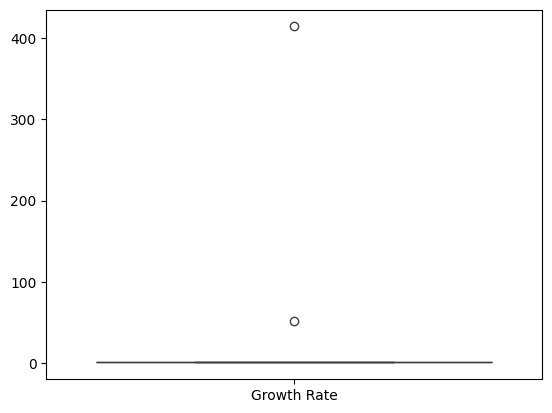

In [52]:
sns.boxplot(data=top_countries_by_growth_rate)
plt.show()

In [53]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [ ]:
area_df = df[['Country','Area (km²)','World Population Percentage']]

In [94]:
area_df.sort_values(by='Area (km²)',ascending=False)

,Country,Area (km²),World Population Percentage
171,Russia,17098242.0,1.81
35,Canada,9984670.0,0.48
41,China,9706961.0,17.88
221,United States,9372610.0,4.24
27,Brazil,8515767.0,2.70
...,...,...,...
142,Nauru,21.0,0.00
209,Tokelau,12.0,0.00
76,Gibraltar,6.0,0.00
134,Monaco,2.0,0.00


In [87]:
area_df.sort_values(by='World Population Percentage',ascending=False)

,Country,Area (km²),World Population Percentage
41,China,9706961.0,17.88
92,India,3287590.0,17.77
221,United States,9372610.0,4.24
93,Indonesia,1904569.0,3.45
156,Pakistan,881912.0,2.96
...,...,...,...
142,Nauru,21.0,0.00
209,Tokelau,12.0,0.00
76,Gibraltar,6.0,0.00
134,Monaco,2.0,0.00


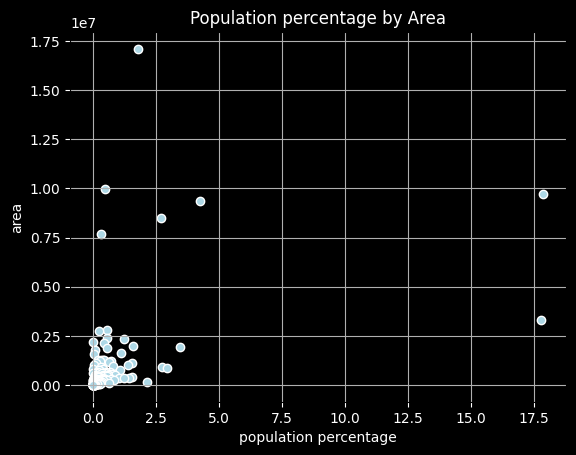

In [ ]:
fig, ax = plt.subplots(facecolor='black')
ax.set_facecolor('black')
ax.scatter(data=area_df, x='World Population Percentage', y='Area (km²)', marker='o', color='lightblue', edgecolors='white')
ax.set_title('Population percentage by Area', color='white')
ax.set_xlabel('population percentage', color='white')
ax.set_ylabel('area', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(True)
plt.show()

In [95]:
density_df = df[['Country','Density (per km²)','World Population Percentage']]


In [96]:
density_df.sort_values(by='Density (per km²)',ascending=False)

,Country,Density (per km²),World Population Percentage
119,Macau,23172.2667,0.01
134,Monaco,18234.5000,0.00
187,Singapore,8416.4634,0.07
89,Hong Kong,6783.3922,0.09
76,Gibraltar,5441.5000,0.00
...,...,...,...
141,Namibia,3.1092,0.03
135,Mongolia,2.1727,0.04
230,Western Sahara,2.1654,0.01
64,Falkland Islands,0.3105,0.00


In [97]:
density_df.sort_values(by='World Population Percentage',ascending=False)

,Country,Density (per km²),World Population Percentage
41,China,146.8933,17.88
92,India,431.0675,17.77
221,United States,36.0935,4.24
93,Indonesia,144.6529,3.45
156,Pakistan,267.4018,2.96
...,...,...,...
209,Tokelau,155.9167,0.00
225,Vanuatu,26.8061,0.00
222,United States Virgin Islands,286.6427,0.00
229,Wallis and Futuna,81.4930,0.00


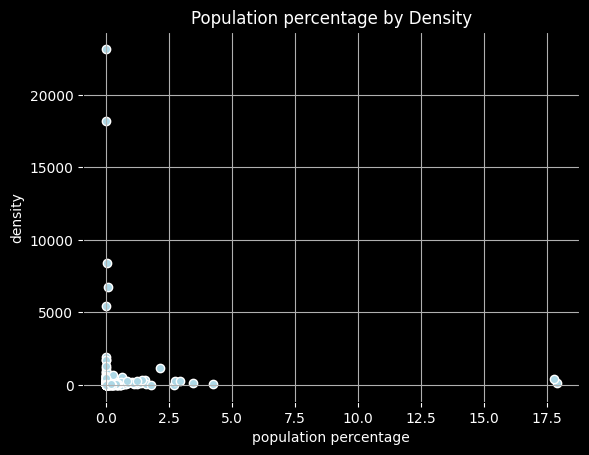

In [93]:
fig, ax = plt.subplots(facecolor='black')
ax.set_facecolor('black')
ax.scatter(data=density_df, x='World Population Percentage', y='Density (per km²)', marker='o', color='lightblue', edgecolors='white')
ax.set_title('Population percentage by Density', color='white')
ax.set_xlabel('population percentage', color='white')
ax.set_ylabel('density', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(True)
plt.show()

In [101]:
growth_rate_df = df[['Country','Area (km²)','Density (per km²)','Growth Rate']]
growth_rate_df

,Country,Area (km²),Density (per km²),Growth Rate
0,Afghanistan,652230.0,63.0587,1.0257
1,Albania,28748.0,98.8702,0.9957
2,Algeria,2381741.0,18.8531,1.0164
3,American Samoa,199.0,222.4774,0.9831
4,Andorra,468.0,170.5641,1.0100
...,...,...,...,...
229,Wallis and Futuna,142.0,81.4930,0.9953
230,Western Sahara,266000.0,2.1654,1.0184
231,Yemen,527968.0,63.8232,1.0217
232,Zambia,752612.0,26.5976,1.0280


In [102]:
growth_rate_df.sort_values(by='Growth Rate',ascending=False)

,Country,Area (km²),Density (per km²),Growth Rate
100,Ivory Coast,322463.0,87.329529,414.151905
101,Jamaica,10991.0,257.244746,52.083841
133,Moldova,33846.0,96.702600,1.069100
164,Poland,312679.0,127.469800,1.040400
148,Niger,1267000.0,20.685100,1.037800
...,...,...,...,...
117,Lithuania,65300.0,42.114200,0.986900
30,Bulgaria,110879.0,61.165400,0.984900
3,American Samoa,199.0,222.477400,0.983100
112,Lebanon,10452.0,525.233400,0.981600


In [103]:
growth_rate_df.sort_values(by='Density (per km²)',ascending=False)

,Country,Area (km²),Density (per km²),Growth Rate
119,Macau,30.0,23172.2667,1.0125
134,Monaco,2.0,18234.5000,0.9941
187,Singapore,710.0,8416.4634,1.0058
89,Hong Kong,1104.0,6783.3922,0.9992
76,Gibraltar,6.0,5441.5000,0.9994
...,...,...,...,...
141,Namibia,825615.0,3.1092,1.0146
135,Mongolia,1564110.0,2.1727,1.0151
230,Western Sahara,266000.0,2.1654,1.0184
64,Falkland Islands,12173.0,0.3105,1.0043


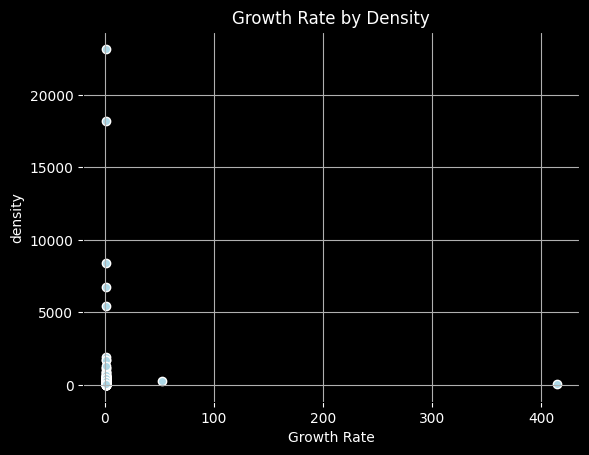

In [ ]:
fig, ax = plt.subplots(facecolor='black')
ax.set_facecolor('black')
ax.scatter(data=growth_rate_df, x='Growth Rate', y='Density (per km²)', marker='o', color='lightblue', edgecolors='white')
ax.set_title('Growth Rate by Density', color='white')
ax.set_xlabel('Growth Rate', color='white')
ax.set_ylabel('density', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(True)
plt.show()

In [106]:
growth_rate_df.sort_values(by='Area (km²)',ascending=False)

,Country,Area (km²),Density (per km²),Growth Rate
171,Russia,17098242.0,8.4636,0.9973
35,Canada,9984670.0,3.8513,1.0078
41,China,9706961.0,146.8933,1.0000
221,United States,9372610.0,36.0935,1.0038
27,Brazil,8515767.0,25.2841,1.0046
...,...,...,...,...
142,Nauru,21.0,603.2381,1.0125
209,Tokelau,12.0,155.9167,1.0119
76,Gibraltar,6.0,5441.5000,0.9994
134,Monaco,2.0,18234.5000,0.9941


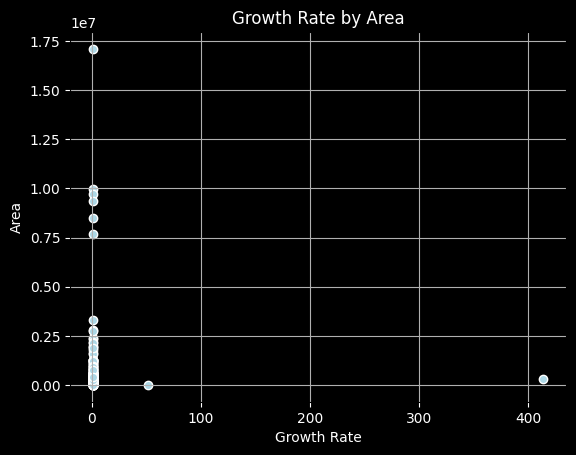

In [105]:
fig, ax = plt.subplots(facecolor='black')
ax.set_facecolor('black')
ax.scatter(data=growth_rate_df, x='Growth Rate', y='Area (km²)', marker='o', color='lightblue', edgecolors='white')
ax.set_title('Growth Rate by Area', color='white')
ax.set_xlabel('Growth Rate', color='white')
ax.set_ylabel('Area', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(True)
plt.show()

In [91]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [107]:
area_density_df = df[['Country','Area (km²)','Density (per km²)']]
area_density_df

,Country,Area (km²),Density (per km²)
0,Afghanistan,652230.0,63.0587
1,Albania,28748.0,98.8702
2,Algeria,2381741.0,18.8531
3,American Samoa,199.0,222.4774
4,Andorra,468.0,170.5641
...,...,...,...
229,Wallis and Futuna,142.0,81.4930
230,Western Sahara,266000.0,2.1654
231,Yemen,527968.0,63.8232
232,Zambia,752612.0,26.5976


In [108]:
area_density_df.sort_values(by='Area (km²)',ascending=False)

,Country,Area (km²),Density (per km²)
171,Russia,17098242.0,8.4636
35,Canada,9984670.0,3.8513
41,China,9706961.0,146.8933
221,United States,9372610.0,36.0935
27,Brazil,8515767.0,25.2841
...,...,...,...
142,Nauru,21.0,603.2381
209,Tokelau,12.0,155.9167
76,Gibraltar,6.0,5441.5000
134,Monaco,2.0,18234.5000


In [109]:
area_density_df.sort_values(by='Density (per km²)',ascending=False)

,Country,Area (km²),Density (per km²)
119,Macau,30.0,23172.2667
134,Monaco,2.0,18234.5000
187,Singapore,710.0,8416.4634
89,Hong Kong,1104.0,6783.3922
76,Gibraltar,6.0,5441.5000
...,...,...,...
141,Namibia,825615.0,3.1092
135,Mongolia,1564110.0,2.1727
230,Western Sahara,266000.0,2.1654
64,Falkland Islands,12173.0,0.3105


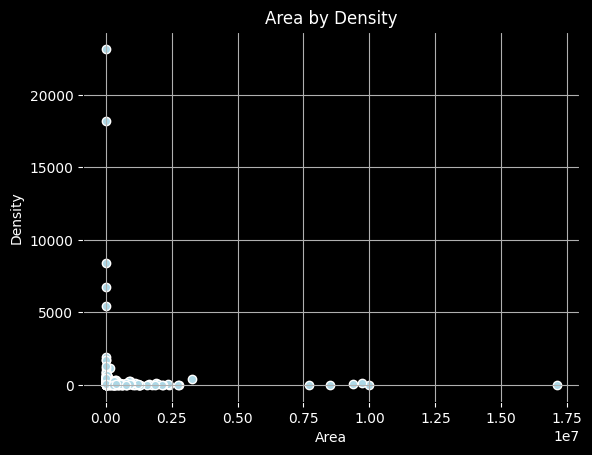

In [110]:
fig, ax = plt.subplots(facecolor='black')
ax.set_facecolor('black')
ax.scatter(data=area_density_df, x='Area (km²)', y='Density (per km²)', marker='o', color='lightblue', edgecolors='white')
ax.set_title('Area by Density', color='white')
ax.set_xlabel('Area', color='white')
ax.set_ylabel('Density', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(True)
plt.show()

# Continent Population Trend 

In [111]:
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.00,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.00,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.00,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.00,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.00,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.00,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.00,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.00,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,57831553.26,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25
